In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [50]:
df = pd.read_csv('Data/df_cleaned.csv', sep=",")
df.shape

(1621, 49)

In [51]:
df

,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,LargestPropertyUseTypeGFA,...,Residence Hall,Restaurant,Retail Store,Self-Storage Facility,Senior Care Community,Small- and Mid-Sized Office,Supermarket / Grocery Store,University,Warehouse,Worship Facility
0,98101.0,7,47.61220,-122.33799,1927,1.0,12,88434,0,88434.0,...,0,0,0,0,0,0,0,0,0,0
1,98101.0,7,47.61317,-122.33393,1996,1.0,11,103566,15064,83880.0,...,0,0,0,0,0,0,0,0,0,0
2,98101.0,7,47.61393,-122.33810,1969,1.0,41,956110,196718,756493.0,...,0,0,0,0,0,0,0,0,0,0
3,98101.0,7,47.61412,-122.33664,1926,1.0,10,61320,0,61320.0,...,0,0,0,0,0,0,0,0,0,0
4,98121.0,7,47.61375,-122.34047,1980,1.0,18,175580,62000,123445.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,0.0,2,47.56722,-122.31154,1990,1.0,1,12294,0,12294.0,...,0,0,0,0,0,0,0,0,0,0
1617,0.0,2,47.59625,-122.32283,2004,1.0,1,16000,0,16000.0,...,0,0,0,0,0,0,0,0,0,0
1618,0.0,7,47.63644,-122.35784,1974,1.0,1,13157,0,7583.0,...,0,0,0,0,0,0,0,0,0,0
1619,0.0,1,47.52832,-122.32431,1989,1.0,1,14101,0,6601.0,...,0,0,0,0,0,0,0,0,0,0


[VISUALIZATION] Boxplot of Building gross floor area

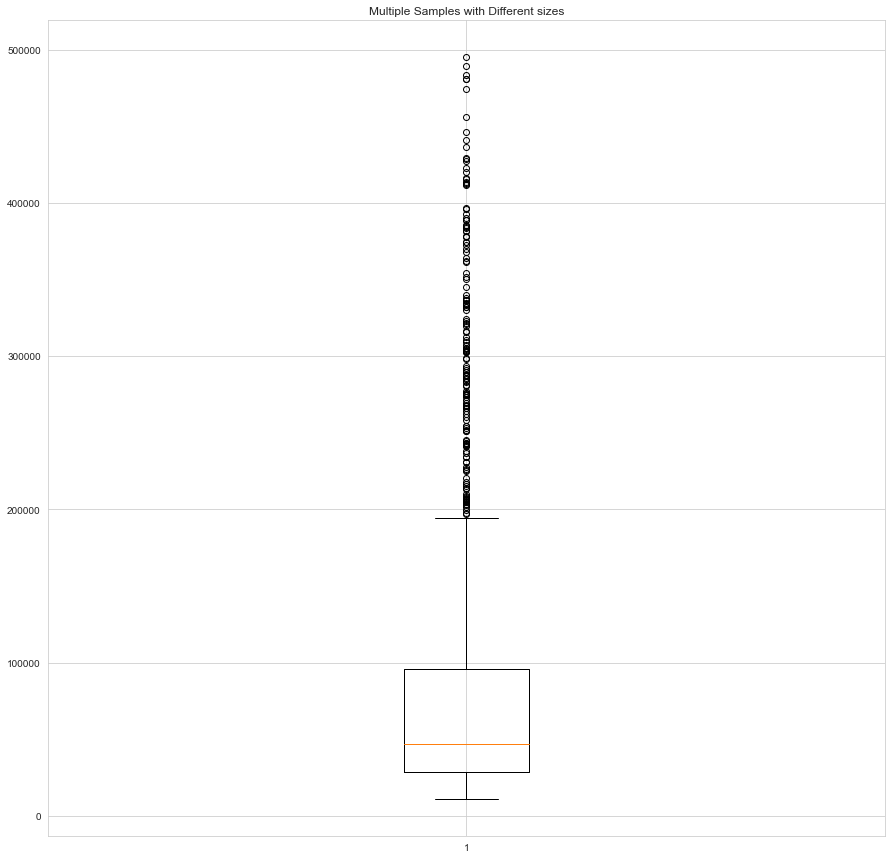

In [52]:
boxplot_data = df['PropertyGFATotal'][df['PropertyGFATotal'] < 500000]
fig7, ax7 = plt.subplots(figsize=(15,15))
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(boxplot_data)
plt.show()

### [VISUALIZATION] Heat map of correlation table

<AxesSubplot:>

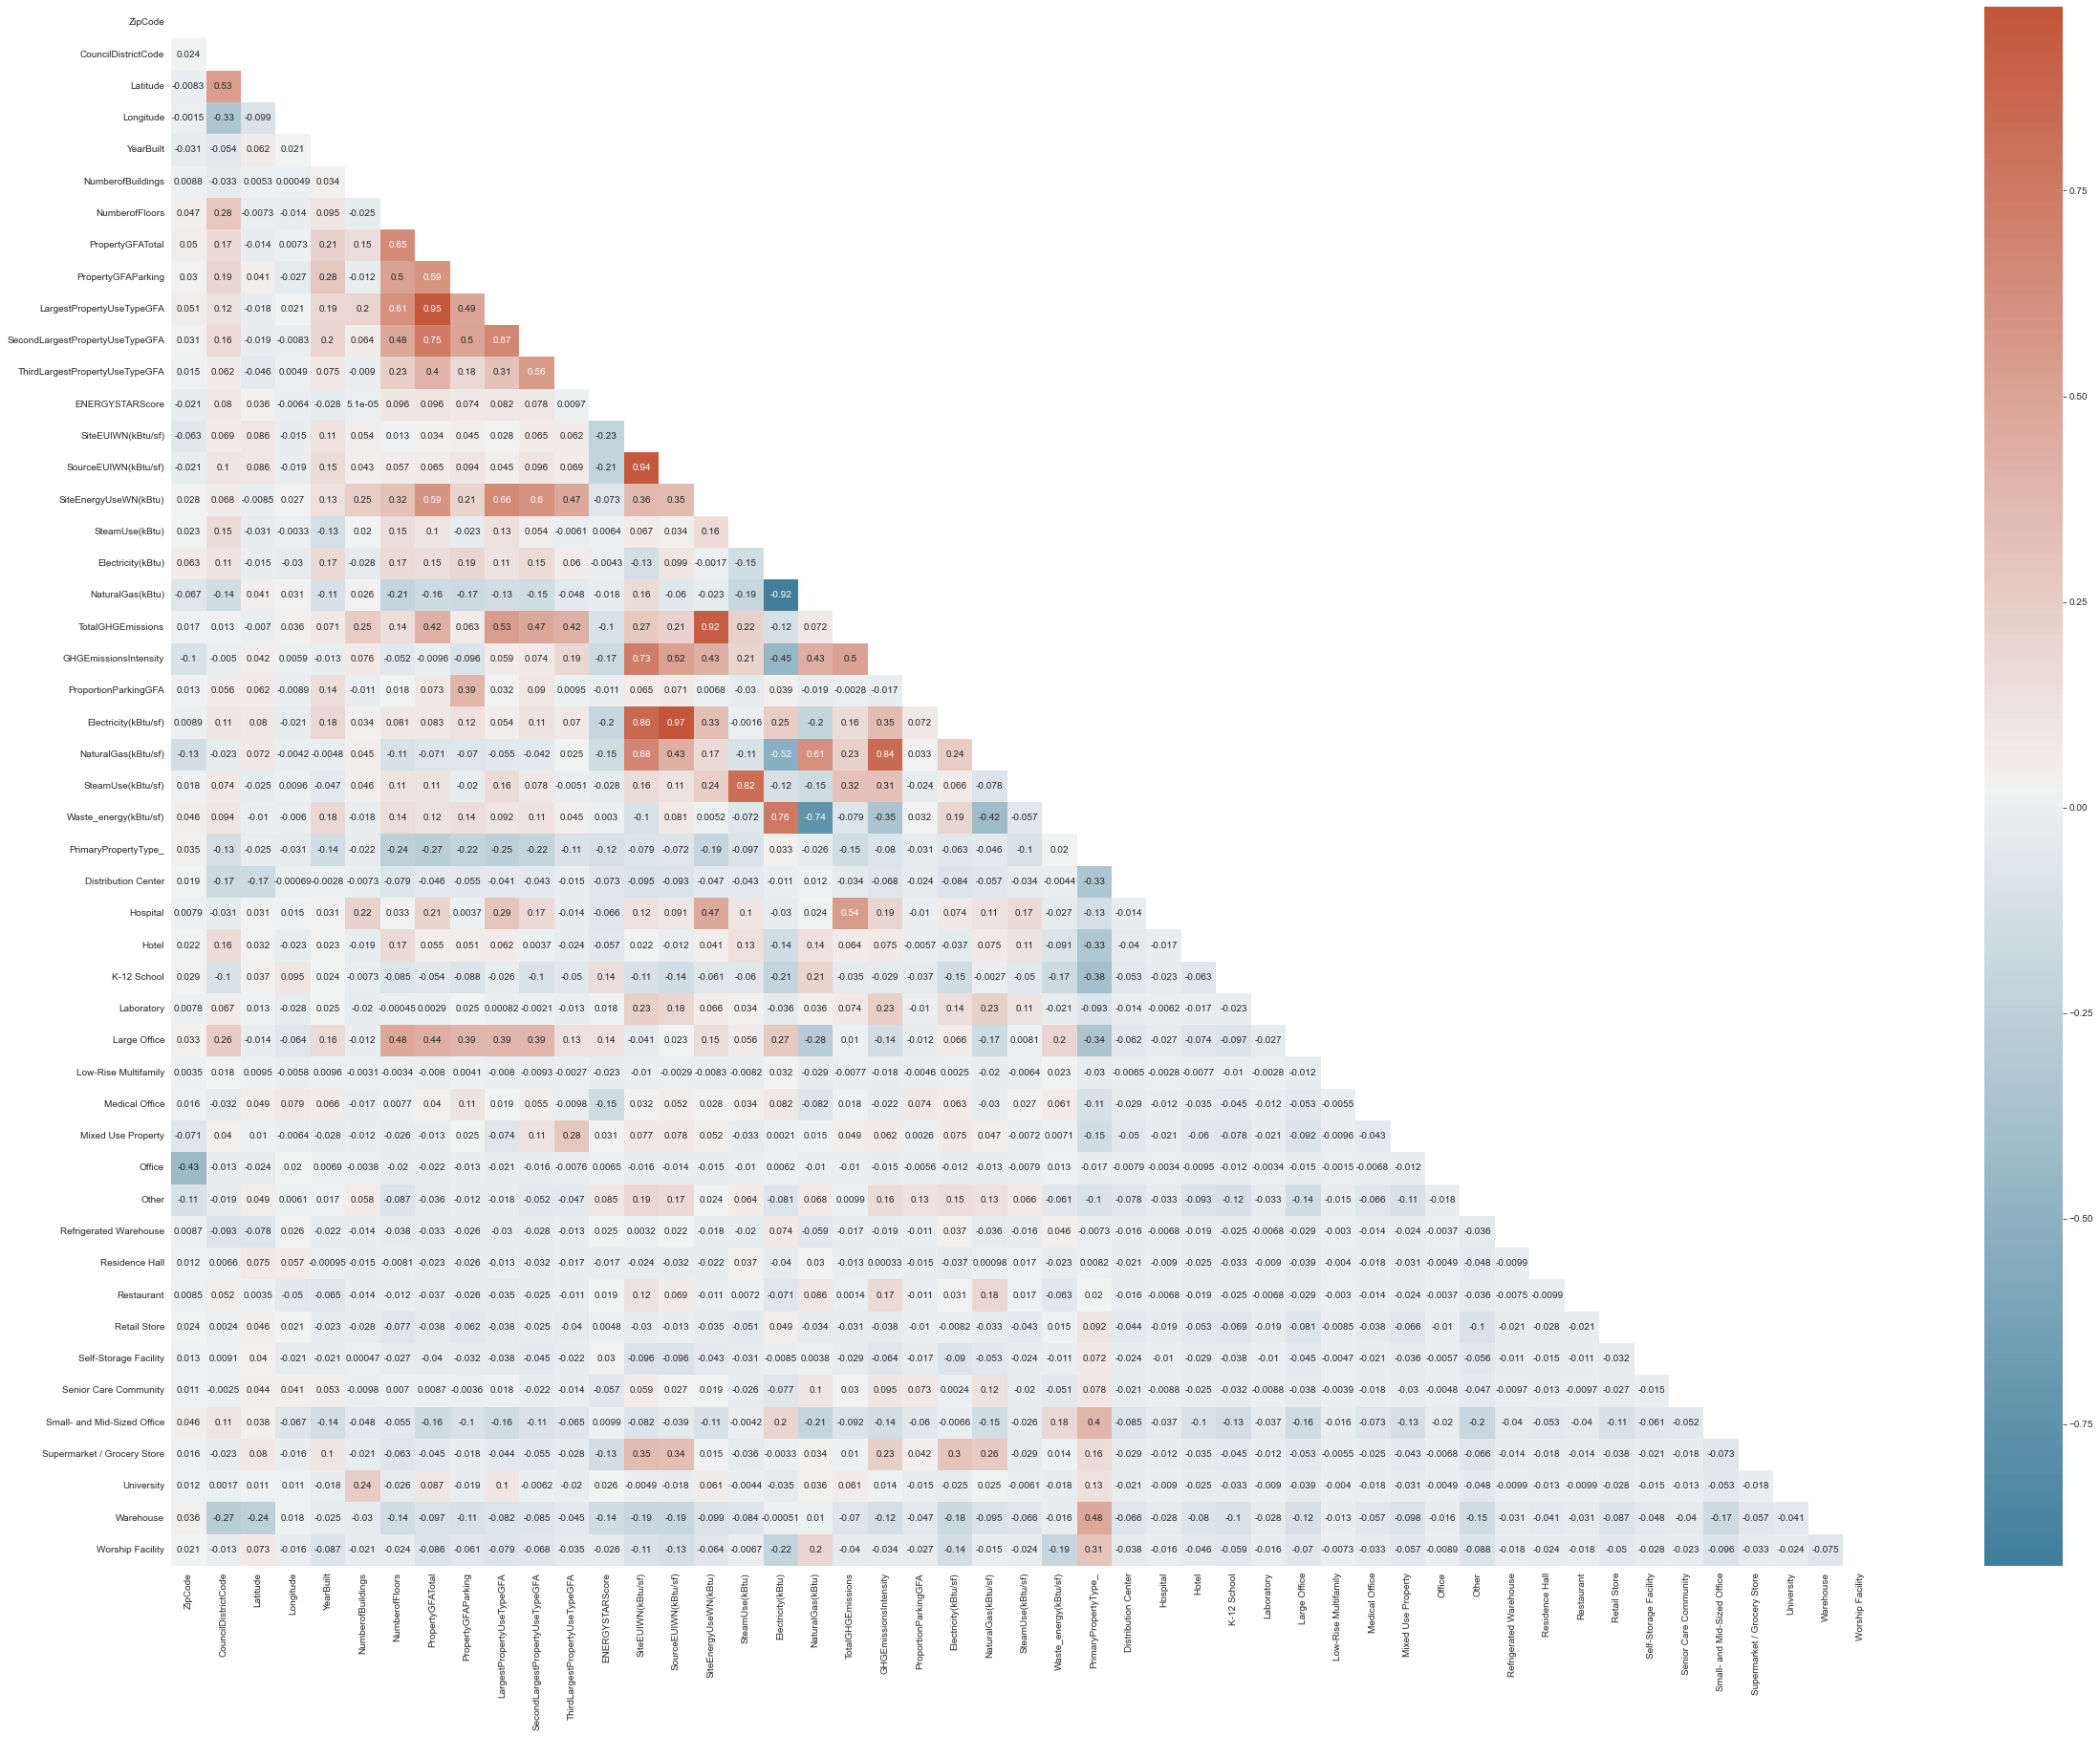

In [53]:
corr = df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(40, 30))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [54]:
fig = px.scatter_mapbox(df,lat='Latitude',lon='Longitude', hover_name="PrimaryPropertyType_", hover_data=['YearBuilt','PropertyGFATotal','GHGEmissionsIntensity'],color_discrete_sequence=[df['PrimaryPropertyType_']], size="SiteEnergyUseWN(kBtu)",size_max=30, height=600, zoom=10)
fig.update_layout(title = 'Seattle map', title_x=0.5)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

##PCA code

In [78]:
df1 = df.drop(labels=['TotalGHGEmissions', 'GHGEmissionsIntensity',
                'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)','Latitude','Longitude','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA','PrimaryPropertyType_','ZipCode'], axis=1, inplace=False)

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_float = df1.astype(dtype='float')
data_rescaled = scaler.fit_transform(df1)

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
df_pca = df1.dropna()
pca.fit(df_pca)

reduced = pca.transform(df_pca)

[0.14765185 0.26615917 0.37157326 0.46353638 0.53164694 0.58672595
 0.63944892 0.68547505 0.72996239 0.76673923 0.79840815 0.82702755
 0.85020096 0.86909439 0.88707818 0.90299038 0.91641424 0.92864354
 0.93967659 0.94969444 0.95866807 0.96734835 0.97357504 0.97881197
 0.98365141 0.98793173 0.99018017 0.99217163 0.99359659 0.99499015
 0.99635135 0.99744203 0.99836948 0.99908842 0.99955075 0.99979455
 1.         1.        ]


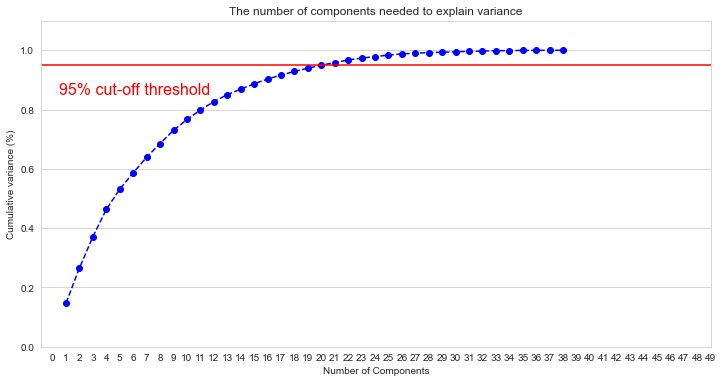

In [81]:
pca = PCA().fit(data_rescaled)

# % matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 39, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
print(y)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 50, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

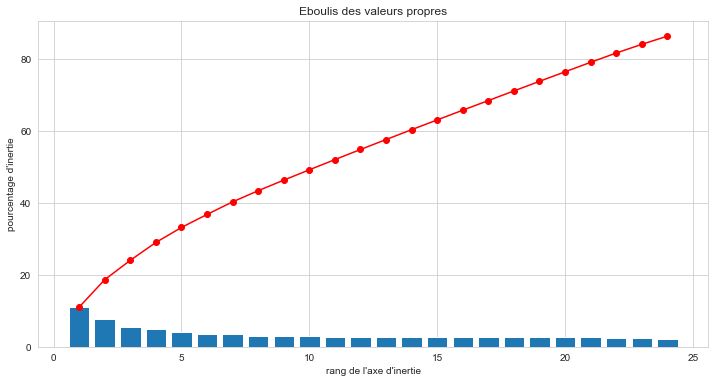

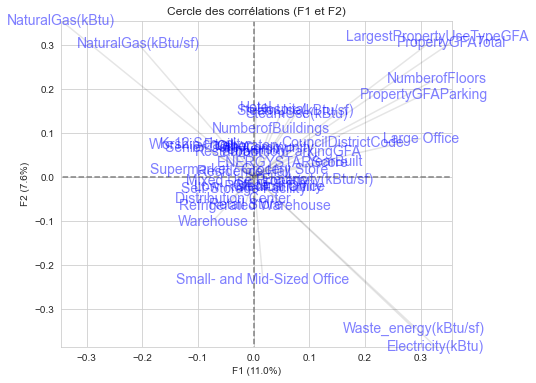

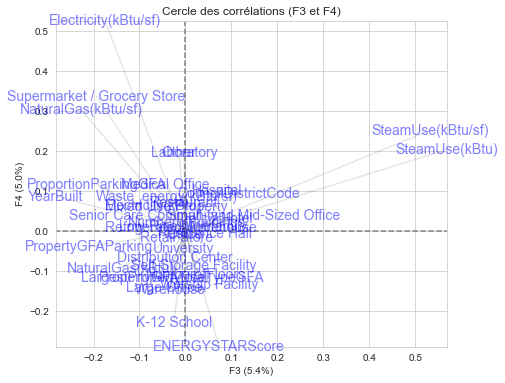

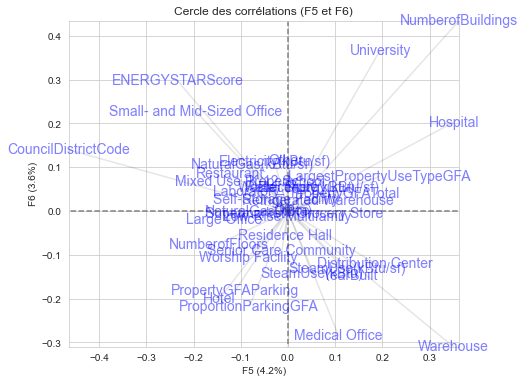

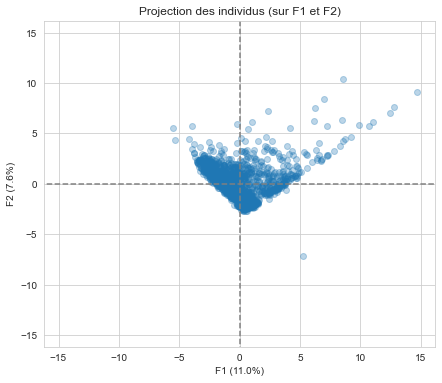

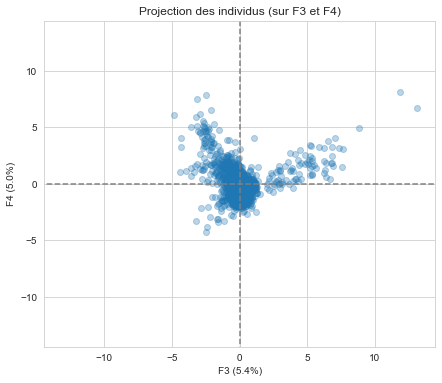

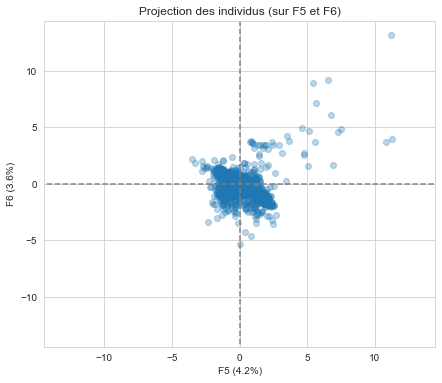

In [82]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

#nombre de composantes à calculer:
n_comp = 24

#colonnes numeriques:
data_pca = df1

# préparation des données pour l'ACP
X = data_pca.values
# names = [data.loc[i, "bad_fodmap"] for i in data.index]  # ou data.index pour avoir les intitulés
features = df1.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)],alpha = 0.3)

plt.show()